In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


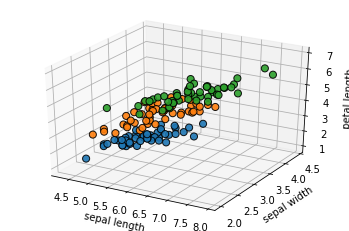

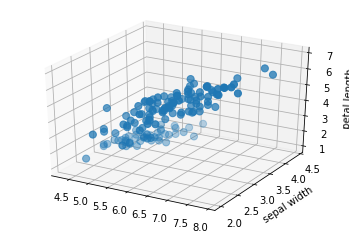

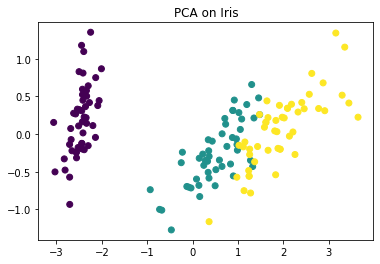

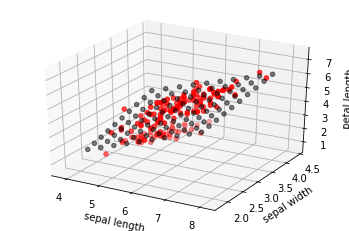

In [5]:
# Project 4d iris to 3d and 2d usign PCA


import numpy as np
import matplotlib.pyplot as plt
import os

images_dir = '/content/drive/MyDrive/AdvancedML/Homework1/Fig1.9/'
figdir = "figures"


def savefig(fname):
    plt.savefig(os.path.join(figdir, fname))


try:
    from sklearn.datasets import load_iris
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

iris = load_iris()
X = iris.data
y = iris.target

fig = plt.figure().gca(projection="3d")
colors = ["g", "b", "o"]
for c in range(3):
    x0 = X[y == c, 0]
    x1 = X[y == c, 1]
    x2 = X[y == c, 2]
    fig.scatter(x0, x1, x2, colors[c], edgecolors="k", s=50, alpha=0.9, marker="o", label=iris.target_names[c])
fig.set_xlabel("sepal length")
fig.set_ylabel("sepal width")
fig.set_zlabel("petal length")
# plt.legend()
plt.savefig(f"{images_dir}/iris-3dscatterplot.png")
plt.show()


fig = plt.figure().gca(projection="3d")
fig.scatter(X[:, 0], X[:, 1], X[:, 2], s=50, marker="o")
fig.set_ylabel("sepal width")
fig.set_zlabel("petal length")
plt.savefig(f"{images_dir}/iris-3dscatterplot-nocolor.png")
plt.show()

# 2d projection of points
X = iris.data[:, 0:3]
pca_xy = PCA(n_components=2).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(pca_xy[:, 0], pca_xy[:, 1], c=y)
ax.set_title("PCA on Iris")
plt.savefig(f"{images_dir}/iris-pca.png")
plt.show()


# plot 3d reconstructed planar surface
pca = PCA(n_components=2)
mu = np.mean(X, axis=0)
Xc = X - mu  # center the data
pca.fit(Xc)
W = pca.components_.T  # D*K
Z = np.dot(Xc, W)  # N * K latent scores
Xrecon = np.dot(Z, W.T) + mu  # N*D

# span the latent space in area covered by data
a = np.min(Z[:, 0])
b = np.max(Z[:, 0])
c = np.min(Z[:, 1])
d = np.max(Z[:, 1])
z0 = np.linspace(a, b, 10)
z1 = np.linspace(c, d, 10)
ZZ0, ZZ1 = np.meshgrid(z0, z1)
Zgrid = np.c_[ZZ0.ravel(), ZZ1.ravel()]  # 100x2
plane = np.dot(Zgrid, W.T) + mu  # N*D

latent_corners = np.array([[a, c], [a, d], [b, c], [b, d]])  # 4x2
recon_corners = np.dot(latent_corners, W.T) + mu  # 4x3

fig = plt.figure().gca(projection="3d")
scatterplot = fig.scatter(X[:, 0], X[:, 1], X[:, 2], color="red")
# recon = fig.scatter(Xrecon[:,0], Xrecon[:,1], Xrecon[:,2], marker='*', color='green')
lineplot = fig.scatter(plane[:, 0], plane[:, 1], plane[:, 2], color="black", alpha=0.5)
fig.set_xlabel("sepal length")
fig.set_ylabel("sepal width")
fig.set_zlabel("petal length")
plt.savefig(f"{images_dir}/iris-pca-3d.png")
plt.show()